In [1]:
import numpy as np
import math
import statistics
from sklearn import preprocessing
import networkx as nx
import matplotlib.pyplot as plt
import logging 

In [2]:
location_matrix=[]

with open('MandlCoords.txt', 'r') as f: 
    for line in f.readlines():
        location_matrix.append([float(x) for x in line.split()])
        
location_matrix       

[[1.0, 5.0],
 [1.0, 9.0],
 [3.0, 8.0],
 [4.5, 7.75],
 [2.75, 6.2],
 [0.8, 6.6],
 [4.6, 6.0],
 [7.0, 4.5],
 [5.5, 5.0],
 [8.5, 6.8],
 [5.8, 3.25],
 [3.8, 2.25],
 [1.3, 3.5],
 [5.25, 1.0],
 [6.7, 1.75]]

In [5]:
def normalise(x : float) -> float:
    
    if x < 1: 
        return x
    orginal_num = x
    num_position = []
    
    while x != 0: 
        num_position.append(x % 10)
        x = x // 10
        print(x)
    
    return orginal_num / (10**len(num_position))


normalise(8.0)

0.0


0.8

In [12]:
def normalise(x : float) -> float:
    
    if x < 1: 
        return x
    orginal_num = x
    num_position = []
    
    while x != 0: 
        num_position.append(x % 10)
        x = x // 10
    
    return orginal_num / (10**len(num_position))

distance_matrix = []
connected_nodes = {}
with open('MandlTravelTimes.txt', 'r') as f: 
    for line in f.readlines()[::2]:
        row = []
        for x in line.split():
            element = float(x) if x != 'Inf' else 0
            row.append(element) 
        distance_matrix.append(row)
   
#! use own normaliseatiopn 
normalised_distance_matrix = np.reshape(([normalise(x) for x in np.array(distance_matrix).flatten()]), np.shape(distance_matrix))
#flip so we reward short distances in the selection equation
for index_r, row in enumerate(normalised_distance_matrix):
    for index_e, element in enumerate(row):
        if element != 0: 
            normalised_distance_matrix[index_r][index_e] = 1 - element 

all_row_means = []
for row in normalised_distance_matrix:
    row_mean = []
    for element in row: 
        if element != 0: 
            row_mean.append(element)
            
    all_row_means.append(statistics.mean(row_mean))
        
mean_of_none_zero_distance_elements = statistics.mean(all_row_means) 
pheromone_matrix = np.ones(np.shape(distance_matrix))*mean_of_none_zero_distance_elements

#normalise this 
busyness_matrix = []
with open('MandlDemand.txt', 'r') as f: 
    for line in f.readlines()[::2]:
        row = []
        for x in line.split():
            element = float(x)
            row.append(element) 
        busyness_matrix.append(row)
        
minMaxScaler = preprocessing.MinMaxScaler()
normalised_busyness_matrix = np.reshape(minMaxScaler.fit([np.array(busyness_matrix).flatten()]), np.shape(busyness_matrix))
          

    

plt.figure(figsize=(8,6))
G = nx.Graph()
for index, pos in enumerate(location_matrix):
    G.add_node(index, pos=pos)
    
for index_r, row in enumerate(distance_matrix):
    node_to_node = []
    for index_e, element in enumerate(row):
        if element != 0: 
            node_to_node.append(index_e)
            G.add_edge(index_r, index_e)
    connected_nodes[index_r] = node_to_node
    
    
       
pos = nx.get_node_attributes(G, 'pos')    
nx.draw(G, pos=pos, with_labels=True)           
normalised_busyness_matrix


ValueError: cannot reshape array of size 1 into shape (14,14)

In [41]:
# pheromone_matrix = np.ones(np.shape(normalised_distance_matrix))*statistics.mean([statistics.mean(row) for row in normalised_distance_matrix])
# pheromone_matrix
connected_nodes
distance_matrix
pheromone_matrix 
busyness_matrix

{0: [1],
 1: [0, 2, 3, 4],
 2: [1, 5],
 3: [1, 4, 5, 11],
 4: [1, 3],
 5: [2, 3, 7, 14],
 6: [9, 14],
 7: [5, 9, 14],
 8: [14],
 9: [6, 7, 10, 12, 13],
 10: [9, 11, 12],
 11: [3, 10],
 12: [9, 10, 13],
 13: [9, 12],
 14: [5, 6, 7, 8]}

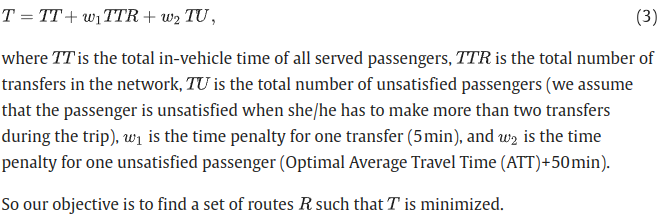


In [ ]:
logger_file = 'ACO_logger.txt'

logging.basicConfig(filename=logger_file, format='%(asctime)s %(message)s', filemode='w')
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [ ]:
K = 15 # number of ants 
E = 0.997 # evapoartion rate
Q = 5 # pheromone laying rate 
A = 5 # pheremone weight
B = 1 # distance weight / route visibility 
Y = 1 # edge busyness weight

STOP = 2000
REWARD_SHORTEST = True
RANDOMISE_START = False
LOG = False
FOLDS = 1

ant_metadata = {}
for ant in range(K):
    ant_metadata[ant] = {
        'start_node' : 5, 
        'current_node' : 5, 
        'vistied_nodes' : [], 
        'path_tracker' : [],
        'i_have_been_stuck_once_already' : False
        } 
    

In [ ]:
def pick_node(ant : int) -> int: 
    
    p_dict = {}
    
    while True: 
        
        possible_nodes = [x for x in connected_nodes[ant_metadata[ant]['current_node']]\
            if x not in ant_metadata[ant]['vistied_nodes']]     
        
        if (len(possible_nodes) > 0):
            break
        else:
            if ant_metadata[ant]['i_have_been_stuck_once_already']: 
                #ant has gawts ta stap
                break
            else: 
                ant_metadata[ant]['current_node'] = ant_metadata[ant]['start_node']
                ant_metadata[ant]['path_tracker'].reverse()
            
        
    denominator =  sum([(connected_nodes[node][x]**A)*\
        (connected_nodes[node][x]**B)*\
        ()for x in possible_nodes])
    
    for p_node in possible_nodes:
        pheromone = pheromone_matrix[node][p_node]
        distance = normalised_distance[node][p_node]

        p = ((pheromone**A)*(distance**B)) / denominator
        p_dict[p_node] = p 
            
    node_picker = np.random.random()
    sum_of_p = 0
    for node in p_dict.keys():
        sum_of_p += p_dict[node]
        if node_picker < sum_of_p:
            return node

path_tracker = {}
start_node = 5

#for iterations 
for x in range (STOP):
    
    #for ants in K 
    for ant in range(K):
        
        path_tracker[ant] = []
        current_node = start_node
        visitied_node_tracker = [current_node]
        
        #while ant not at target: 
        while current_node != finish_node:
            
            #pick next node (watch out for dead ends) 
            
            #move ant 
            #update node tracking 
            
        #store route found by the ant
        #log move
            
        #eveapourate_pheromone (set a min value to avoid algorithm crash)
        
        #grade solutions and apply pheromone         